In [1]:
import pandas as pd

data = pd.read_csv('cardio_data.csv', delimiter=';')

data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469.0,1,155.0,69.0,130.0,80.0,2,2,0,0,1,0.0
1,989,14648.0,1,163.0,71.0,110.0,70.0,1,1,0,0,1,1.0
2,990,21901.0,1,165.0,70.0,120.0,80.0,1,1,0,0,1,0.0
3,991,14549.0,2,165.0,85.0,120.0,80.0,1,1,1,1,1,0.0
4,992,23393.0,1,155.0,62.0,120.0,80.0,1,1,0,0,1,0.0


In [2]:
#découvrir si le dataset contient des attrbuts des valeur null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69303 entries, 0 to 69302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69303 non-null  int64  
 1   age          69301 non-null  float64
 2   gender       69303 non-null  int64  
 3   height       69301 non-null  float64
 4   weight       69303 non-null  float64
 5   ap_hi        69302 non-null  float64
 6   ap_lo        69302 non-null  float64
 7   cholesterol  69303 non-null  int64  
 8   gluc         69303 non-null  int64  
 9   smoke        69303 non-null  int64  
 10  alco         69303 non-null  int64  
 11  active       69303 non-null  int64  
 12  cardio       69302 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 6.9 MB


In [3]:
#découvrir spécifiquement les attributs contenant les valeurs aberrantes
#d'apres les résultats les valeurs manquantes sont localisées au niveau des attibuts age, ap_hi,ap_lo et cardio
data.isna().sum()

id             0
age            2
gender         0
height         2
weight         0
ap_hi          1
ap_lo          1
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         1
dtype: int64

In [4]:
import numpy as np
#remplacer les valeurs manquantes par Nan
data = data.replace('?',np.NaN)

#Afficher le nombre d'instances et attributs 
print('Nombre instances = %d' % (data.shape[0]))
print('Numbre attributs = %d' % (data.shape[1]))

#Afficher le nombre de valeurs manquantes totales
print('Nombre de valeurs manquantes:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Nombre instances = 69303
Numbre attributs = 13
Nombre de valeurs manquantes:
	id: 0
	age: 2
	gender: 0
	height: 2
	weight: 0
	ap_hi: 1
	ap_lo: 1
	cholesterol: 0
	gluc: 0
	smoke: 0
	alco: 0
	active: 0
	cardio: 1


In [5]:
#choix de l'attribut age en raison du fait il contient 2 valeurs manquantes
data2 = data['age']
#affichage spécique des instances contenant la donnée manquante dans age.Exemple: L'instance 203
print('Before replacing missing values:')
print(data2[198:208])

Before replacing missing values:
198    19722.0
199    18018.0
200    16709.0
201    20994.0
202    19614.0
203        NaN
204    19092.0
205    14404.0
206    23606.0
207    21192.0
Name: age, dtype: float64


In [6]:
#utilisation de la fonction median() pour remplacer la donnée manquante par la médiane des données
data2 = data2.fillna(data2.median())
#l'instance 203 a été remplacé par 19704.0 jours
print('\Aprés remplacement des données manquantes:')
print(data2[198:208])

\Aprés remplacement des données manquantes:
198    19722.0
199    18018.0
200    16709.0
201    20994.0
202    19614.0
203    19704.0
204    19092.0
205    14404.0
206    23606.0
207    21192.0
Name: age, dtype: float64


In [7]:
#nous décidons maintenant de l'appliquer pour l'ensemble du dataset
new_data = data
#affichage spécique des instances contenant les donnée manquantes dans le dataset.Exemple: L'instance 203
print('Avant remplacement:')
print(new_data[198:208])
#utilisation de la fonction median() pour remplacer les données manquantes avec la valeur la médiane des données
new_data = new_data.fillna(new_data.median())
#exemple dans l'instance 203 age a été remplacé par 19704.0 jours, height= 165, ap_lo=80
print('\Aprés remplacement des données manquantes:')
print(new_data[198:208])

Avant remplacement:
       id      age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
198  1248  19722.0       2   167.0    78.0  150.0   90.0            2     2   
199  1250  18018.0       2   160.0    85.0  120.0   60.0            1     1   
200  1252  16709.0       1   156.0    62.0  120.0   80.0            1     1   
201  1253  20994.0       1   156.0    72.0  140.0  100.0            2     1   
202  1254  19614.0       1   163.0    63.0  120.0   80.0            3     3   
203  1254      NaN       1     NaN    63.0  120.0    NaN            3     3   
204  1255  19092.0       1   159.0    63.0  150.0   80.0            2     1   
205  1256  14404.0       1   166.0    64.0  110.0   70.0            1     1   
206  1257  23606.0       1   162.0    62.0  120.0   80.0            1     3   
207  1258  21192.0       1   159.0    74.0  160.0  100.0            3     1   

     smoke  alco  active  cardio  
198      0     0       0     1.0  
199      0     0       1     0.0  
200  

In [8]:
new_data.head(205)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469.0,1,155.0,69.0,130.0,80.0,2,2,0,0,1,0.0
1,989,14648.0,1,163.0,71.0,110.0,70.0,1,1,0,0,1,1.0
2,990,21901.0,1,165.0,70.0,120.0,80.0,1,1,0,0,1,0.0
3,991,14549.0,2,165.0,85.0,120.0,80.0,1,1,1,1,1,0.0
4,992,23393.0,1,155.0,62.0,120.0,80.0,1,1,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1252,16709.0,1,156.0,62.0,120.0,80.0,1,1,0,0,1,0.0
201,1253,20994.0,1,156.0,72.0,140.0,100.0,2,1,0,0,1,1.0
202,1254,19614.0,1,163.0,63.0,120.0,80.0,3,3,0,0,0,1.0
203,1254,19704.0,1,165.0,63.0,120.0,80.0,3,3,0,0,0,0.0


In [9]:
import numpy as np
#revérification des données manquantes
#Afficher le nombre d'instances et attributs 
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

#Afficher le nombre de valeurs manquantes totales
print('Nombre de valeurs manquantes:')
for col in new_data.columns:
    print('\t%s: %d' % (col,new_data[col].isna().sum()))

Number of instances = 69303
Number of attributes = 13
Nombre de valeurs manquantes:
	id: 0
	age: 0
	gender: 0
	height: 0
	weight: 0
	ap_hi: 0
	ap_lo: 0
	cholesterol: 0
	gluc: 0
	smoke: 0
	alco: 0
	active: 0
	cardio: 0


In [10]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69303 entries, 0 to 69302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69303 non-null  int64  
 1   age          69303 non-null  float64
 2   gender       69303 non-null  int64  
 3   height       69303 non-null  float64
 4   weight       69303 non-null  float64
 5   ap_hi        69303 non-null  float64
 6   ap_lo        69303 non-null  float64
 7   cholesterol  69303 non-null  int64  
 8   gluc         69303 non-null  int64  
 9   smoke        69303 non-null  int64  
 10  alco         69303 non-null  int64  
 11  active       69303 non-null  int64  
 12  cardio       69303 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 6.9 MB


In [11]:
#calcul de la moyenne , écart type, valeur min et max des nouvelles valeurs
from pandas.api.types import is_numeric_dtype
for col in new_data.columns:
    if is_numeric_dtype(new_data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % new_data[col].mean())
        print('\t Standard deviation = %.2f' % new_data[col].std())
        print('\t Minimum = %.2f' % new_data[col].min())
        print('\t Maximum = %.2f' % new_data[col].max())

id:
	 Mean = 50470.06
	 Standard deviation = 28563.91
	 Minimum = 988.00
	 Maximum = 99999.00
age:
	 Mean = 19468.79
	 Standard deviation = 2467.23
	 Minimum = 10798.00
	 Maximum = 23713.00
gender:
	 Mean = 1.35
	 Standard deviation = 0.48
	 Minimum = 1.00
	 Maximum = 2.00
height:
	 Mean = 164.36
	 Standard deviation = 8.21
	 Minimum = 55.00
	 Maximum = 250.00
weight:
	 Mean = 74.20
	 Standard deviation = 14.38
	 Minimum = 10.00
	 Maximum = 200.00
ap_hi:
	 Mean = 128.83
	 Standard deviation = 154.77
	 Minimum = -150.00
	 Maximum = 16020.00
ap_lo:
	 Mean = 96.65
	 Standard deviation = 189.09
	 Minimum = -70.00
	 Maximum = 11000.00
cholesterol:
	 Mean = 1.37
	 Standard deviation = 0.68
	 Minimum = 1.00
	 Maximum = 3.00
gluc:
	 Mean = 1.23
	 Standard deviation = 0.57
	 Minimum = 1.00
	 Maximum = 3.00
smoke:
	 Mean = 0.09
	 Standard deviation = 0.28
	 Minimum = 0.00
	 Maximum = 1.00
alco:
	 Mean = 0.05
	 Standard deviation = 0.23
	 Minimum = 0.00
	 Maximum = 1.00
active:
	 Mean = 0.80
	 St

In [12]:
#Découverte des attributs qualitatifs et quantitatifs
#Tous les attributs sont quantitatif en raison du fait la fonction donne la moyenne, écart type et les autres quantiles comme min,max,median
#s'il y'avait du qualitatif alors unique, to et freq vont s'afficher
new_data.describe(include='all')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69303.000000,69303.000000,69303.000000,69303.000000,69303.000000,69303.000000,69303.000000,69303.000000,69303.000000,69303.000000,69303.000000,69303.000000,69303.000000
mean,50470.059925,19468.793068,1.349509,164.362235,74.202863,128.829329,96.649611,1.366824,1.226469,0.088048,0.053879,0.803977,0.499574
std,28563.912080,2467.226540,0.476818,8.205219,14.383324,154.773578,189.093533,0.680290,0.572278,0.283367,0.225781,0.396989,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25743.500000,17664.500000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50492.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75149.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#en raison des données multivariées, on effectue une correlation pour déterminer la relation entre les attributs
#on remarque une relation moyenne des attributs en relation avec cardio
print('Correlation:')
new_data.corr()

Correlation:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003582,0.003809,-0.003738,-0.001529,0.003271,-0.002753,0.006354,0.002476,-0.003278,0.000395,0.002738,0.004318
age,0.003582,1.000000,-0.023152,-0.081304,0.054407,0.020662,0.017717,0.154339,0.099091,-0.047680,-0.029435,-0.009928,0.238089
gender,0.003809,-0.023152,1.000000,0.499367,0.155655,0.005981,0.015397,-0.036353,-0.021181,0.337612,0.171018,0.006257,0.008613
height,-0.003738,-0.081304,0.499367,1.000000,0.290330,0.005492,0.006215,-0.050628,-0.018924,0.187898,0.094163,-0.005976,-0.011017
weight,-0.001529,0.054407,0.155655,0.290330,1.000000,0.030666,0.043653,0.141867,0.107212,0.068307,0.067261,-0.016491,0.182102
ap_hi,0.003271,0.020662,0.005981,0.005492,0.030666,1.000000,0.015919,0.023570,0.011818,-0.000933,0.001385,0.000033,0.054212
ap_lo,-0.002753,0.017717,0.015397,0.006215,0.043653,0.015919,1.000000,0.024020,0.010891,0.004948,0.010765,0.004964,0.065292
cholesterol,0.006354,0.154339,-0.036353,-0.050628,0.141867,0.023570,0.024020,1.000000,0.451800,0.010228,0.036007,0.009634,0.220712
gluc,0.002476,0.099091,-0.021181,-0.018924,0.107212,0.011818,0.010891,0.451800,1.000000,-0.004619,0.011432,-0.007394,0.089015
smoke,-0.003278,-0.047680,0.337612,0.187898,0.068307,-0.000933,0.004948,0.010228,-0.004619,1.000000,0.339710,0.025800,-0.015216


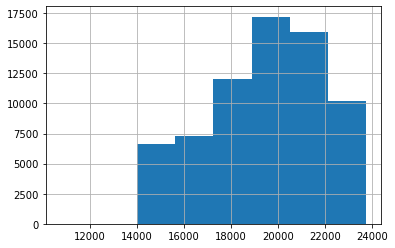

In [14]:
#Affichage de l'histogramme des attributs en le discrétisant en 50 bacs distincts et en comptant la fréquence pour chaque bac.
%matplotlib inline

data['age'].hist(bins=8)

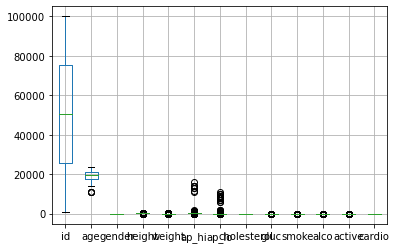

In [15]:
#Dessiner pour identifier les données aberrantes
#Cela suggére la présence de données aberrantes dans plusieurs attributs
#notre cible est le cardio, nous le représenterons sa relation avec les autres attributs 
data.boxplot()

In [16]:
#création de visualisation de données pour donner un meilleur sens aux données et les autres étapes
import seaborn as sns
import matplotlib.pyplot as plt

def plot_incidence(feature):
    cats = set(data[feature].values)
    
    xs = range(0, len(cats))
    ys_bar=[]
    ys_line = []
    
    for cat in cats:
        ys_bar.append(new_data[new_data[feature] == cat].shape[0])
        ys_line.append(new_data[(new_data[feature] == cat) & (new_data.cardio == 1)].shape[0]/new_data.shape[0] * 100)
    
    fig, ax = plt.subplots()
    
    ax.bar(xs, ys_bar, color='grey')

    ax2 = ax.twinx()
    ax2.plot(xs, ys_line, color='teal')
    
    ax.set_xticks(xs)
    ax.set_xticklabels(cats, rotation=90)
    ax.set_xlabel(feature)
    
    ax.set_ylabel('Frequency (n)')
    ax2.set_ylabel('Incidence (%)')
    
    fig.suptitle(f"Cardio incidence by {feature}")
    
    return plt.show()

In [17]:
cont_vars = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

#transformation de la variable age en années au lieu de jour
new_data.age = new_data.age.apply(lambda x: x / 365)
data.age = data.age.apply(lambda x: x / 365)
cat_vars = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

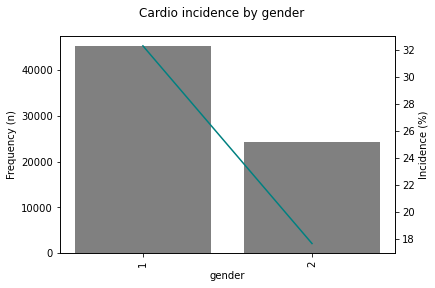

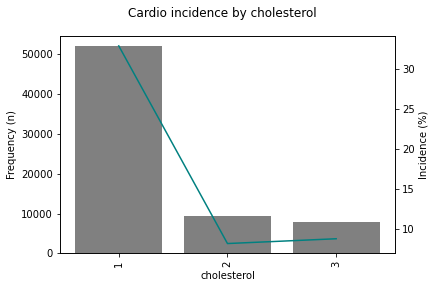

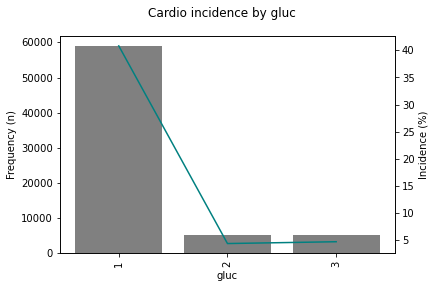

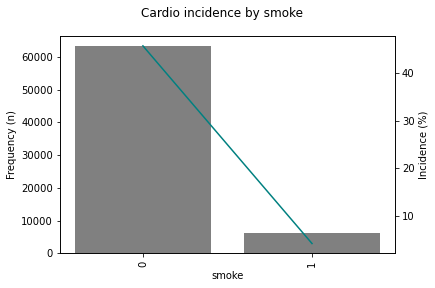

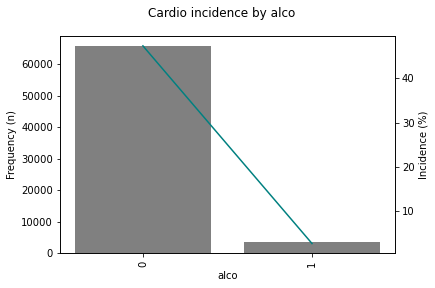

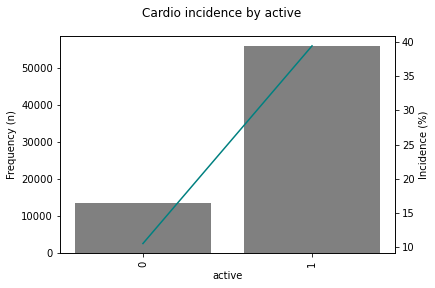

In [18]:
#Mise en place d'une boucle des variables catégoricielles et création d'un graphe d'"incidence" pour aider à voir les incidences(%)de maladies cardiovasculaires
#par catégorie.Celà apprendra que les certaines catégories ont définitivement plus de risque.
for var in cat_vars:
    plot_incidence(var)

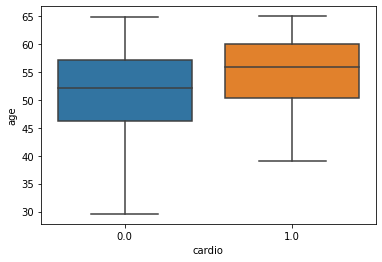

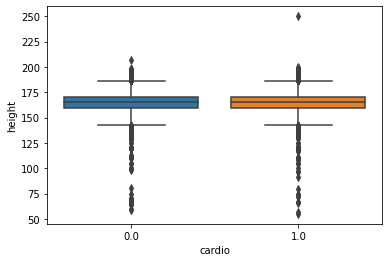

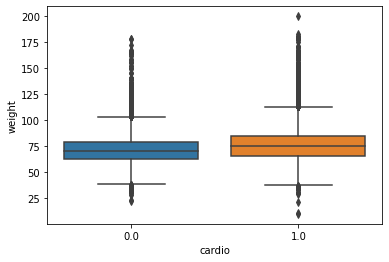

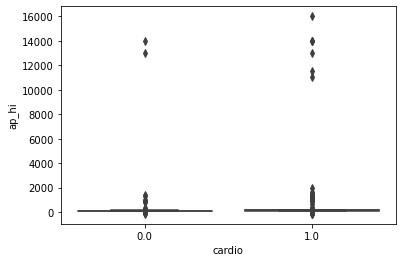

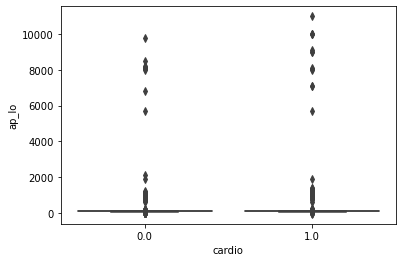

In [19]:
#Mise en place d'une boucle de variables continues pour avoir un meilleur sens de leur distribution et cible.Celà va suggérer la présence de données aberrantes dans beaucoup de variables continues
for var in cont_vars:
    _ = sns.boxplot(x='cardio', y=var, data=data)
    plt.show()

In [20]:
Z = (new_data - new_data.mean())/new_data.std()
Z[0:69303]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-1.732328,1.216024,-0.733002,-1.141010,-0.361729,0.007564,-0.088050,0.930744,1.351669,-0.310721,-0.238635,0.493775,-0.999142
1,-1.732293,-1.953932,-0.733002,-0.166021,-0.222679,-0.121657,-0.140933,-0.539217,-0.395733,-0.310721,-0.238635,0.493775,1.000844
2,-1.732258,0.985806,-0.733002,0.077727,-0.292204,-0.057047,-0.088050,-0.539217,-0.395733,-0.310721,-0.238635,0.493775,-0.999142
3,-1.732223,-1.994058,1.364233,0.077727,0.750670,-0.057047,-0.088050,-0.539217,-0.395733,3.218272,4.190434,0.493775,-0.999142
4,-1.732188,1.590534,-0.733002,-1.141010,-0.848404,-0.057047,-0.088050,-0.539217,-0.395733,-0.310721,-0.238635,0.493775,-0.999142
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69298,1.733759,-0.092733,1.364233,0.443348,0.124946,-0.057047,-0.088050,-0.539217,-0.395733,3.218272,-0.238635,0.493775,-0.999142
69299,1.733829,1.269525,-0.733002,-0.775389,3.601194,0.072174,-0.035166,0.930744,1.351669,-0.310721,-0.238635,0.493775,1.000844
69300,1.733864,-0.163257,1.364233,2.271452,2.141170,0.330616,-0.035166,2.400705,-0.395733,-0.310721,4.190434,-2.025185,1.000844
69301,1.733934,1.200622,-0.733002,-0.166021,-0.153154,0.039869,-0.088050,-0.539217,1.351669,-0.310721,-0.238635,-2.025185,1.000844


In [21]:
#on essaie de supprimer les z-score supérieur et inférieur à 3 et -3
#Aucune ligne n'est supprimé au final, nous ne voulons pas prendre de risque de changer la condition sous peine de
#supprimer des données importantes car ces grandes valeurs qui se différent peuvent étre importantes et normales
#dans le mileur des maladies cardiovasculaire
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 69303
Number of rows after discarding missing values = 0


In [22]:
#verification de données dupliquées
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
new_data.loc[[0,69302]]

Number of duplicate rows = 0


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61.558904,1,155.0,69.0,130.0,80.0,2,2,0,0,1,0.0
69302,99999,56.273973,1,170.0,72.0,120.0,80.0,2,1,0,0,1,0.0


In [23]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61.558904,1,155.0,69.0,130.0,80.0,2,2,0,0,1,0.0
1,989,40.131507,1,163.0,71.0,110.0,70.0,1,1,0,0,1,1.0
2,990,60.002740,1,165.0,70.0,120.0,80.0,1,1,0,0,1,0.0
3,991,39.860274,2,165.0,85.0,120.0,80.0,1,1,1,1,1,0.0
4,992,64.090411,1,155.0,62.0,120.0,80.0,1,1,0,0,1,0.0


In [24]:
#on effectue un échantillonage pour voir de façon globale l'organisation des données sans effectuer de remplacement
#Un échantillonnage de 3 a été choisit au hasard sans remplacement dans les données originales
sample = new_data.sample(n=3)
sample

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
25150,36892,62.416438,2,179.0,97.0,140.0,100.0,1,1,1,0,1,1.0
61455,88751,56.087671,1,154.0,81.0,120.0,80.0,1,1,0,0,1,0.0
4833,7865,58.150685,1,158.0,71.0,110.0,70.0,2,1,0,1,1,0.0


In [25]:
#we randomly select 1% of the data (without replacement) and display the selected samples. 
#The random_state argument of the function specifies the seed value of the random number generator.
sample = new_data.sample(frac=0.01, random_state=1)
sample

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
50157,72561,58.068493,2,163.0,107.0,170.0,80.0,2,1,0,0,1,1.0
54401,78597,49.909589,1,167.0,75.0,150.0,80.0,1,1,0,0,1,1.0
31180,45527,58.495890,1,155.0,62.0,110.0,70.0,2,1,0,0,1,1.0
5996,9545,56.041096,2,184.0,74.0,120.0,80.0,1,2,0,0,1,0.0
14294,21427,45.687671,1,162.0,60.0,160.0,100.0,2,1,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54597,78879,53.660274,2,170.0,58.0,120.0,90.0,3,3,0,0,1,0.0
24293,35692,63.950685,2,170.0,72.0,120.0,80.0,2,2,1,0,1,1.0
32910,48009,53.997260,2,65.0,72.0,130.0,80.0,1,1,0,0,0,0.0
42684,61981,60.309589,1,153.0,70.0,120.0,60.0,1,1,1,0,1,0.0


In [26]:
new_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61.558904,1,155.0,69.0,130.0,80.0,2,2,0,0,1,0.0
1,989,40.131507,1,163.0,71.0,110.0,70.0,1,1,0,0,1,1.0
2,990,60.002740,1,165.0,70.0,120.0,80.0,1,1,0,0,1,0.0
3,991,39.860274,2,165.0,85.0,120.0,80.0,1,1,1,1,1,0.0
4,992,64.090411,1,155.0,62.0,120.0,80.0,1,1,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69298,99993,52.712329,2,168.0,76.0,120.0,80.0,1,1,1,0,1,0.0
69299,99995,61.920548,1,158.0,126.0,140.0,90.0,2,2,0,0,1,1.0
69300,99996,52.235616,2,183.0,105.0,180.0,90.0,3,1,0,1,0,1.0
69301,99998,61.454795,1,163.0,72.0,135.0,80.0,1,2,0,0,0,1.0


In [27]:
#step 2
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

In [28]:
cont_vars = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

cat_vars = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

#Mise en place du bmi (body mass index) indice de masse corporel et suppression des attributs heigh et weight
#le BMI regroupe les deux attibuts height et weight c'est pourquoi c'est exprimé en kg/m2
#C'est une valeur dérivée de la taille et du poids
#le weight divisé par height
#les attributs height et weight ne sont pas aussi informatifs
 
new_data['bmi'] = round(new_data.weight/new_data.height * 100, 2)
new_data['bmi_cat'] = pd.cut(new_data.bmi, pd.IntervalIndex.from_tuples([(0, 18.5), (18.5, 25), (25, 30), (30, 1000)]))
cat_vars.append('bmi_cat')

cont_vars.remove('height')
cont_vars.remove('weight')

# conversion de age en attribut categoriciel
new_data.age = new_data.age.apply(lambda x: round(x))
new_data['age_cat'] = pd.qcut(new_data.age, q=10, duplicates='drop', labels=[x for x in range(0, 10)])

cat_vars.append('age_cat')
cont_vars.remove('age')

# Création de liste pour les variables finales
final_vars = []
final_vars.extend(cont_vars)
final_vars.extend(cat_vars)


In [29]:
#l'attribut age et bmi ont été catégorisé, 
new_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_cat,age_cat
0,988,62,1,155.0,69.0,130.0,80.0,2,2,0,0,1,0.0,44.52,"(30.0, 1000.0]",8
1,989,40,1,163.0,71.0,110.0,70.0,1,1,0,0,1,1.0,43.56,"(30.0, 1000.0]",0
2,990,60,1,165.0,70.0,120.0,80.0,1,1,0,0,1,0.0,42.42,"(30.0, 1000.0]",7
3,991,40,2,165.0,85.0,120.0,80.0,1,1,1,1,1,0.0,51.52,"(30.0, 1000.0]",0
4,992,64,1,155.0,62.0,120.0,80.0,1,1,0,0,1,0.0,40.00,"(30.0, 1000.0]",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69298,99993,53,2,168.0,76.0,120.0,80.0,1,1,1,0,1,0.0,45.24,"(30.0, 1000.0]",4
69299,99995,62,1,158.0,126.0,140.0,90.0,2,2,0,0,1,1.0,79.75,"(30.0, 1000.0]",8
69300,99996,52,2,183.0,105.0,180.0,90.0,3,1,0,1,0,1.0,57.38,"(30.0, 1000.0]",3
69301,99998,61,1,163.0,72.0,135.0,80.0,1,2,0,0,0,1.0,44.17,"(30.0, 1000.0]",8


In [30]:
# spliting into train and test set
x_train, x_test, y_train, y_test = train_test_split(new_data[final_vars], new_data.cardio, test_size=.1, random_state=42)

In [31]:
#62372 lignes sont entrainées dans le modele d'entrainement
x_train.shape

(62372, 10)

In [32]:
#6931 lignes sont entrainées dans le modele de test
x_test.shape

(6931, 10)

In [33]:
#One-hot encoding is a process by which categorical data (such as nominal data) are converted into numerical feature
#s of a dataset. This is often a required preprocessing step since machine learning models require numerical data.
#if a feature is represented by that column, it receives a 1. Otherwise, it receives a 0.
#Because machine learning algorithms assume (and require) your data to be numeric, categorical data must be 
#pre-processed in order for it to be accepted.
#if we were to ask any classification or regression model to be built using the categorical data, an error would be raised. 
#This is because machine learning algorithms cannot work with non-numerical data.
#the data obtained contains features of various dimensions and scales altogether. 
#Different scales of the data features affect the modeling of a dataset adversely.
#It leads to a biased outcome of predictions in terms of misclassification error and accuracy rates. 
#Thus, it is necessary to Scale the data prior to modeling.

# setting up a pipeline to transform categorical variables to one hot encoded variables and to scale continuous variables
ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), cat_vars), ('scaler', StandardScaler(), cont_vars)])

# note that we only fit it using data that will be used to fit the model: x_train
ct.fit(x_train)

ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                 ['gender', 'cholesterol', 'gluc', 'smoke',
                                  'alco', 'active', 'bmi_cat', 'age_cat']),
                                ('scaler', StandardScaler(),
                                 ['ap_hi', 'ap_lo'])])

In [34]:
# transformation x_train and x_test basé sur le pipeline
x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

In [35]:
#entrainement du model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
import time
# Créer le modèle d'arbres de décision
model = DecisionTreeRegressor(max_depth=10,random_state=42)

# Entraîner le modèle sur les données d'entraînement
start = time.time()
model.fit(x_train, y_train.values)
end = time.time()
# Faire des prédictions sur les données de test
y_pred = model.predict(x_test).round()
# Convertir les prédictions en un DataFrame 
df = pd.DataFrame(y_pred, columns=['cardio']) 
# Enregistrer le DataFrame au format CSV 
df.to_csv('predictions.csv', index=False)
# Calculer la MSE sur les prédictions
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print(f"decision tree fit in {(end - start) /60} mins")

MSE:  0.2709565719232434
decision tree fit in 0.0031311829884847005 mins


In [36]:
import time
decision_tree = tree.DecisionTreeClassifier()

start = time.time()
decision_tree = decision_tree.fit(x_train, y_train.values)
end = time.time()

score = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("MSE: ", mse)
print(f"decision tree fit in {(end - start) /60} mins")

Accuracy: 0.7290434280767566
MSE:  0.2709565719232434
decision tree fit in 0.005103615919748942 mins


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74      3478
         1.0       0.75      0.68      0.72      3453

    accuracy                           0.73      6931
   macro avg       0.73      0.73      0.73      6931
weighted avg       0.73      0.73      0.73      6931



Text(0, 0.5, 'Accuracy')

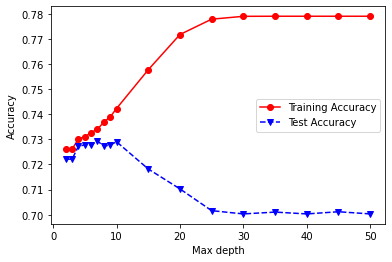

In [38]:
from sklearn import tree
from sklearn.metrics import accuracy_score

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(x_train, y_train.values)
    Y_predTrain = clf.predict(x_train)
    Y_predTest = clf.predict(x_test)
    trainAcc[index] = accuracy_score(y_train.values, Y_predTrain)
    testAcc[index] = accuracy_score(y_test, Y_predTest)
    index += 1

#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

#The plot above shows that training accuracy will continue to improve as the maximum depth of 
#the tree increases (i.e., as the model becomes more complex). 
#However, the test accuracy initially improves up to a maximum depth of 5, 
#before it gradually decreases due to model overfitting.

In [39]:
#Optimizing Decision Tree Performance
from sklearn.tree import DecisionTreeClassifier 
import time
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
start = time.time()
clf = clf.fit(x_train,y_train)
end = time.time()

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(f"apres optimisation avec de nouveau parametre: decision tree fit in {(end - start) /60} mins")

Accuracy: 0.7221180204876642
apres optimisation avec de nouveau parametre: decision tree fit in 0.001629336675008138 mins


In [40]:
#regression logistique
import time

lr = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', refit=True, random_state=42)

start = time.time()
lr.fit(x_train, y_train.values)
end = time.time()
mse = mean_squared_error(y_test, y_pred) 
print("MSE:", mse)
print(f"logistic regression fit in {(end - start) /60} mins")

MSE: 0.2778819795123359
logistic regression fit in 0.5665873487790426 mins


In [41]:
from sklearn.metrics import classification_report

for key, value in {'TRAIN': [x_train, y_train], 'TEST': [x_test, y_test]}.items():
    preds = lr.predict(value[0])
    print(f"{key} RESULTS\n\n{classification_report(preds, value[1])}\n\n")

TRAIN RESULTS

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     33849
         1.0       0.68      0.74      0.71     28523

    accuracy                           0.72     62372
   macro avg       0.72      0.73      0.72     62372
weighted avg       0.73      0.72      0.72     62372



TEST RESULTS

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      3818
         1.0       0.67      0.75      0.71      3113

    accuracy                           0.72      6931
   macro avg       0.72      0.73      0.72      6931
weighted avg       0.73      0.72      0.73      6931





In [42]:
#Step 5: Interpreting the Model
feature_names = []
feature_names.extend(cont_vars)

for cat in cat_vars:
    for val in set(new_data[cat].values):
        feature_names.append(f"{cat}_{val}")

In [43]:
feature_coefs = {feature: coefficient for feature, coefficient in zip(feature_names, lr.coef_[0])} 

In [44]:
feature_df = pd.Series(feature_coefs).to_frame()
feature_df = feature_df.reset_index()

    feature_df.rename(columns={'index': 'feature', 0: 'log_prob'}, inplace=True)

feature_df['odds'] = feature_df.log_prob.apply(np.exp)

In [45]:
feature_df

,feature,log_prob,odds
0,ap_hi,0.003610,1.003617
1,ap_lo,0.028982,1.029406
2,gender_1,-0.159508,0.852563
3,gender_2,0.288040,1.333810
4,cholesterol_1,1.019319,2.771306
5,cholesterol_2,-0.073153,0.929459
6,cholesterol_3,0.028902,1.029324
7,gluc_1,-0.390114,0.676980
8,gluc_2,-0.009065,0.990976
9,gluc_3,-0.126580,0.881103


In [46]:
# manually changing the odds ratio for age_cat_8 because it was stretching the plot too much
feature_df.at[28, 'odds'] = 4

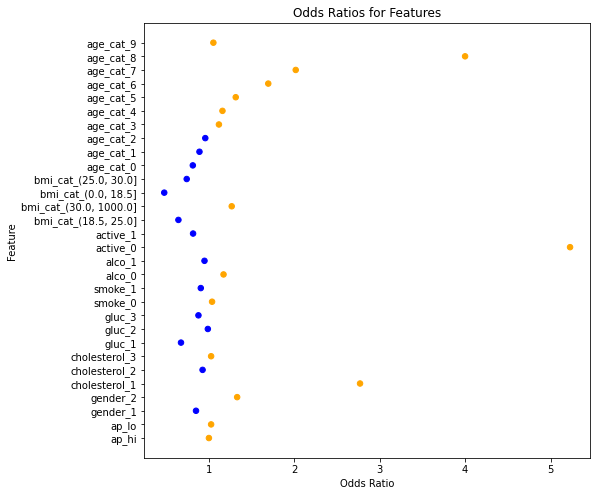

In [47]:
# plotting
ys = [y for y in range(0, 30)]
xs = feature_df.odds.values
cs = []

for x in xs:
    if x < 1:
        cs.append('blue')
    elif x == 1:
        
        cs.append('grey')
    else:
        cs.append('orange')
    
fig = plt.figure(figsize=(8, 8))
_ = plt.scatter(xs, ys,s=30,color=cs)

plt.yticks(ticks=ys, labels=feature_df.feature.values)
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.title('Odds Ratios for Features')
plt.show()